In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
cd C:\Users\sonal\OneDrive\Documents\Data Science\Linear regression

C:\Users\sonal\OneDrive\Documents\Data Science\Linear regression


In [7]:
df = pd.read_csv('House_Prices.csv')
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


> No nulls present.

In [11]:
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [17]:
df.quantile([0.25,0.5,0.75,0.99])

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
0.25,32.75,111325.0,1880.0,3.00,2.0,2.0
0.50,64.50,125950.0,2000.0,3.00,2.0,3.0
0.75,96.25,148250.0,2140.0,3.00,3.0,3.0
0.99,126.73,196476.0,2505.7,4.73,3.0,5.0


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# The column Home is just acting like an index, therefore drop that column
df1 = df[['Price','SqFt','Bedrooms','Offers','Bathrooms']]
df1.head()

,Price,SqFt,Bedrooms,Offers,Bathrooms
0,114300,1790,2,2,2
1,114200,2030,4,3,2
2,114800,1740,3,1,2
3,94700,1980,3,3,2
4,119800,2130,3,3,3


C:\Users\sonal\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


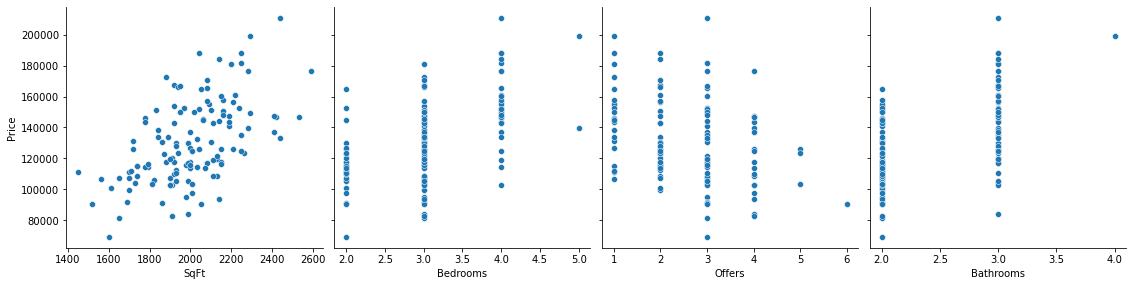

In [31]:
sns.pairplot(df1, x_vars=['SqFt','Bedrooms','Offers','Bathrooms'], y_vars='Price',size=4, aspect=1, kind='scatter')
plt.show()

### DOUBT: Data normalization before or after train-test split?

https://datascience.stackexchange.com/questions/54908/data-normalization-before-or-after-train-test-split

Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.

This is because the test set plays the role of fresh unseen data, so it's not supposed to be accessible at the training stage. Using any information coming from the test set before or during training is a potential bias in the evaluation of the performance.

When normalizing the test set, one should apply the normalization parameters previously obtained from the training set as-is. Do not recalculate them on the test set, because they would be inconsistent with the model and this would produce wrong predictions.

Do Normalization after splitting into train and test/validation. The reason is to avoid any data leakage.

Data Leakage:

Data leakage is when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the mode being constructed.

In [37]:
df1.head()

,Price,SqFt,Bedrooms,Offers,Bathrooms
0,114300,1790,2,2,2
1,114200,2030,4,3,2
2,114800,1740,3,1,2
3,94700,1980,3,3,2
4,119800,2130,3,3,3


In [38]:
# Defining X and y variables
X = df[['SqFt','Bedrooms','Offers','Bathrooms']]
y = df.Price

In [39]:
# First do train-test- split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7, random_state=100)

In [40]:
X_train

,SqFt,Bedrooms,Offers,Bathrooms
70,1950,3,3,3
23,1820,3,3,2
120,1930,2,3,3
110,1710,2,1,2
20,1790,3,3,2
...,...,...,...,...
87,1880,3,1,3
103,2440,4,3,3
67,2040,4,3,3
24,2210,4,2,3


In [42]:
X_train.shape, X_test.shape

((89, 4), (39, 4))

In [35]:
# Recsaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [45]:
# Fitting the scaler to train set so that it can learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled)

[[0.43859649 0.33333333 0.4        0.5       ]
 [0.3245614  0.33333333 0.4        0.        ]
 [0.42105263 0.         0.4        0.5       ]
 [0.22807018 0.         0.         0.        ]
 [0.29824561 0.33333333 0.4        0.        ]
 [0.47368421 0.         0.2        0.5       ]
 [0.33333333 0.33333333 0.4        0.5       ]
 [0.46491228 0.33333333 0.4        0.        ]
 [0.84210526 0.33333333 0.6        0.5       ]
 [0.40350877 0.33333333 0.6        0.        ]
 [0.6754386  0.66666667 0.2        0.5       ]
 [0.29824561 0.         0.2        0.        ]
 [0.70175439 0.66666667 0.2        0.5       ]
 [0.52631579 0.         0.         0.        ]
 [0.1754386  0.33333333 0.4        0.        ]
 [0.72807018 0.66666667 0.4        0.5       ]
 [0.09649123 0.         0.         0.        ]
 [0.57017544 0.33333333 0.4        0.        ]
 [0.4122807  0.         0.6        0.        ]
 [0.39473684 0.33333333 0.4        0.5       ]
 [0.60526316 0.33333333 0.6        0.        ]
 [0.39473684 

In [46]:
# Transforming the test set
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled)

[[0.36842105 0.         0.2        0.        ]
 [0.59649123 0.33333333 0.6        0.        ]
 [0.94736842 0.66666667 0.6        0.5       ]
 [0.51754386 0.33333333 0.2        0.5       ]
 [0.57894737 0.33333333 0.2        0.        ]
 [0.48245614 0.33333333 0.6        0.        ]
 [0.25438596 0.         0.2        0.        ]
 [0.53508772 0.         0.         0.        ]
 [0.73684211 0.66666667 0.4        0.5       ]
 [0.35964912 0.         0.4        0.        ]
 [0.85087719 0.66666667 0.6        0.5       ]
 [0.13157895 0.         0.4        0.        ]
 [0.51754386 0.66666667 0.         0.5       ]
 [0.40350877 0.33333333 0.6        0.        ]
 [0.39473684 0.33333333 0.4        0.5       ]
 [0.45614035 0.         0.         0.        ]
 [0.1754386  0.33333333 0.4        0.        ]
 [0.72807018 1.         0.6        0.5       ]
 [0.70175439 0.33333333 0.4        0.5       ]
 [0.69298246 0.66666667 0.4        0.5       ]
 [0.43859649 0.33333333 0.4        0.        ]
 [0.60526316 